Attempting Linear Regression model


In [2]:
import numpy as np

In [6]:
data = np.loadtxt("TestDataSet.txt",delimiter = ',')

x = data[:,0]
y = data[:,1]

print(x.shape)
print(y.shape)

(12,)
(12,)


In [9]:
from sklearn import model_selection

x_train , x_test,y_train,y_test = model_selection.train_test_split(x,y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(9,)
(9,)
(3,)


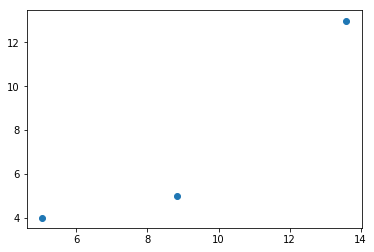

In [15]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
x_train_2D = x_train.reshape(-1,1) # Atleast 2d array needed for features
alg1.fit(x_train_2D,y_train)

x_test_2D = x_test.reshape(-1,1)
y_pred = alg1.predict(x_test_2D)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.show()

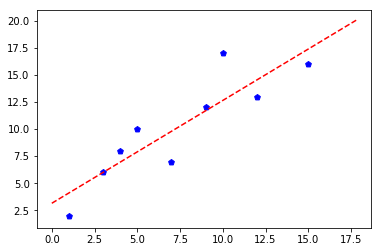

In [22]:
# plotting y = mx+c

m = alg1.coef_[0]
c = alg1.intercept_
x_line = np.arange(0,18,0.2)
y_line = m*x_line + c

# Training data
plt.plot(x_line,y_line,"r--")
plt.scatter(x_train,y_train,color = "blue",marker = "p") 
plt.show()

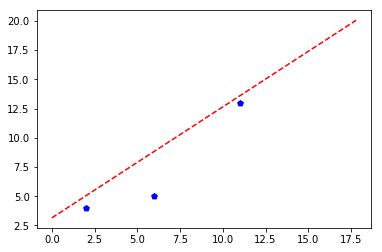

In [23]:
# Testing data

plt.plot(x_line,y_line,"r--")
plt.scatter(x_test,y_test,color = "blue",marker = "p") 
plt.show()

In [28]:
print("M and C :",m,c)
print("Score (training data):",alg1.score(x_train_2D,y_train))
print("Score (test data):",alg1.score(x_test_2D,y_test))

M and C : 0.949799196787 3.14591700134
Score (training data): 0.784496542632
Score (test data): 0.6665602002


Implementing Linear Regression using several functions

Note : Results should be same as above

In [32]:
def fit(x_train,y_train):
    num = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
    den = (x_train*x_train).mean() - x_train.mean()*x_train.mean()
    
    m = num/den
    c = y_train.mean() - m*x_train.mean()
    
    return m,c

def predict(x_test,m,c):
    y_pred = m*x_test + c
    return y_pred

def CD(y_pred,y_truth):  # coefficient of determination
    u = ((y_truth - y_pred) ** 2).mean() # .sum() can also be used
    v = ((y_truth - y_truth.mean()) **2 ).mean()
    
    score = 1 - (u/v)
    return score

def cost(m,c,x,y):
    cost1 = ((y-(m*x+c))**2).mean()
    return cost1

m1,c1 = fit(x_train,y_train)
print("M and C:",m1,c1)
y_test_pred1 = predict(x_test,m1,c1) 
#print("Score (Training data):",CD())
print("Score (Testing data):",CD(y_test_pred1,y_test))

print("Cost :",cost(m1,c1,x,y))

M and C: 0.949799196787 3.14591700134
Score (Testing data): 0.6665602002
Cost : 4.78038492659
